In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:
def simulate(P_0: float, spread_base: float, gamma: float, num_steps: int,
             kappa: float, lambda_inv: float):
    """ This function simulates the model dynamics. The outputs are the relevant quantities for
    the simulation, such as the sequence of prices, of bid and ask, of inventory levels
    
        Args:
        P_0 (float): Initial price
        spread_base (float): Base spread
        gamma (float): Inventory adjustment weight
        num_steps (int): Simulation steps
        kappa (float): Price sensitivity
        lambda_inv (float): Inventory risk penalty
    """
    
    # Initial conditions
    P = P_0
    inventory = 0
    prices = [P]
    inventory_levels = [inventory]
    profits = []
    bid_prices = []
    ask_prices = []
    spreads = [] 
    sides = []

    # Simulation loop
    for t in range(num_steps):
        
        # Market maker sets bid and ask prices
        delta_inventory = gamma * inventory
        P_bid = P - spread_base - abs(min(delta_inventory, 0))
        P_ask = P + spread_base + max(delta_inventory, 0)
        spread = P_ask - P_bid
        bid_prices.append(P_bid)
        ask_prices.append(P_ask)
        spreads.append(spread)

        # Simulate random trades
        order_size = np.random.randint(1, 10)
        side = np.random.choice([-1, 1])

        inventory += order_size * side
        P += kappa * side * order_size

        # Record quantities
        profits.append(spread * order_size - lambda_inv * inventory**2)
        prices.append(P)
        inventory_levels.append(inventory)
        sides.append(side)

    return prices, inventory_levels, profits, bid_prices, ask_prices, spreads, sides

def plot(prices, bid_prices, ask_prices, inventory_levels, profits, title):
    # Plot results
    plt.figure(figsize=(12, 8))
    plt.suptitle(title)

    # Price dynamics
    plt.subplot(3, 1, 1)
    plt.plot(prices, label="Mid Price")
    plt.plot(bid_prices, label="Bid Price", linestyle="--")
    plt.plot(ask_prices, label="Ask Price", linestyle="--")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()

    # Inventory dynamics
    plt.subplot(3, 1, 2)
    plt.plot(inventory_levels, label="Inventory", color="orange")
    plt.axhline(0, color="red", linestyle="--", label="Neutral Inventory")
    plt.xlabel("Time")
    plt.ylabel("Inventory")
    plt.legend()
    plt.grid()

    # Profit dynamics
    plt.subplot(3, 1, 3)
    plt.plot(np.cumsum(profits), label="Cumulative Profit", color="green")
    plt.xlabel("Time")
    plt.ylabel("Profit")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

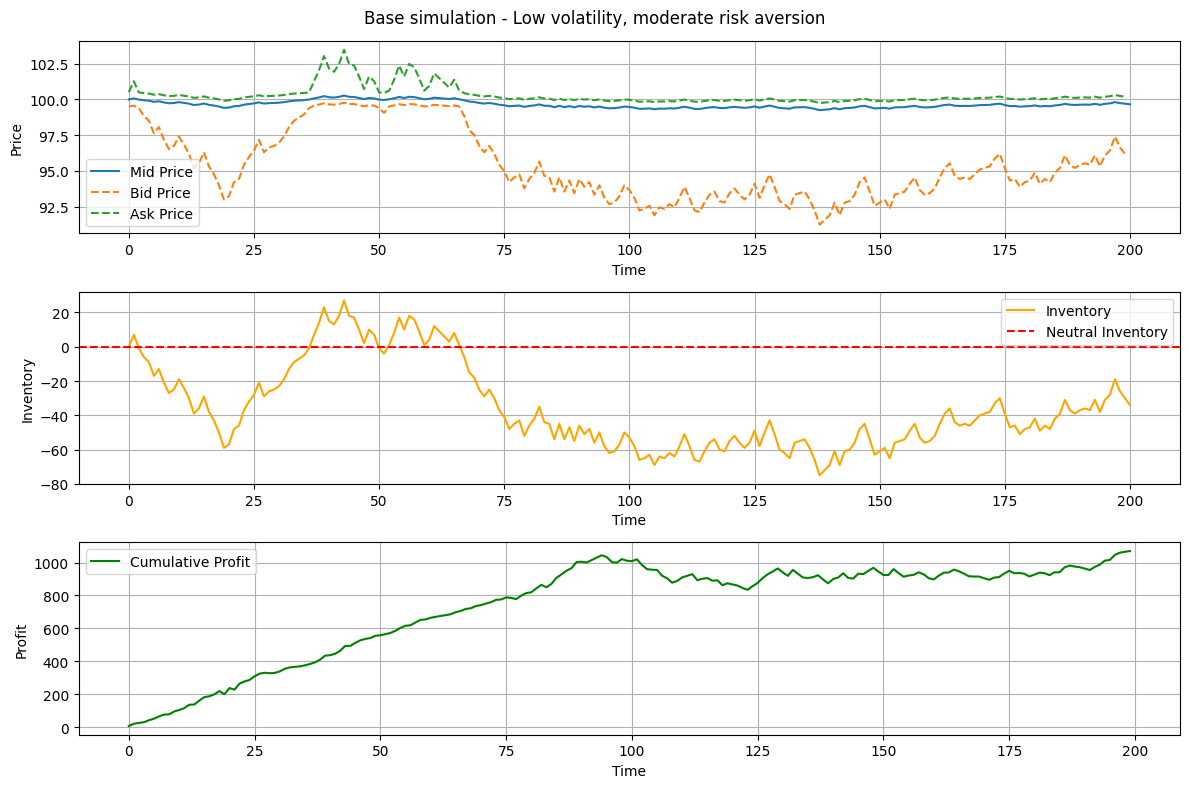

In [109]:
# Parameters
np.random.seed(42)
P_0 = 100          # Initial price
kappa = 0.01       # Price sensitivity
gamma = 0.1        # Inventory adjustment weight
spread_base = 0.5  # Base spread
lambda_inv = 0.01  # Inventory risk penalty
num_steps = 200    # Simulation steps

# Simulation
prices, inventory_levels, profits, bid_prices, ask_prices, spreads, sides = simulate(
    P_0, spread_base, gamma, num_steps, kappa, lambda_inv)

# Plots
plot(prices, bid_prices, ask_prices, inventory_levels, profits,
     title="Base simulation - Low volatility, moderate risk aversion")

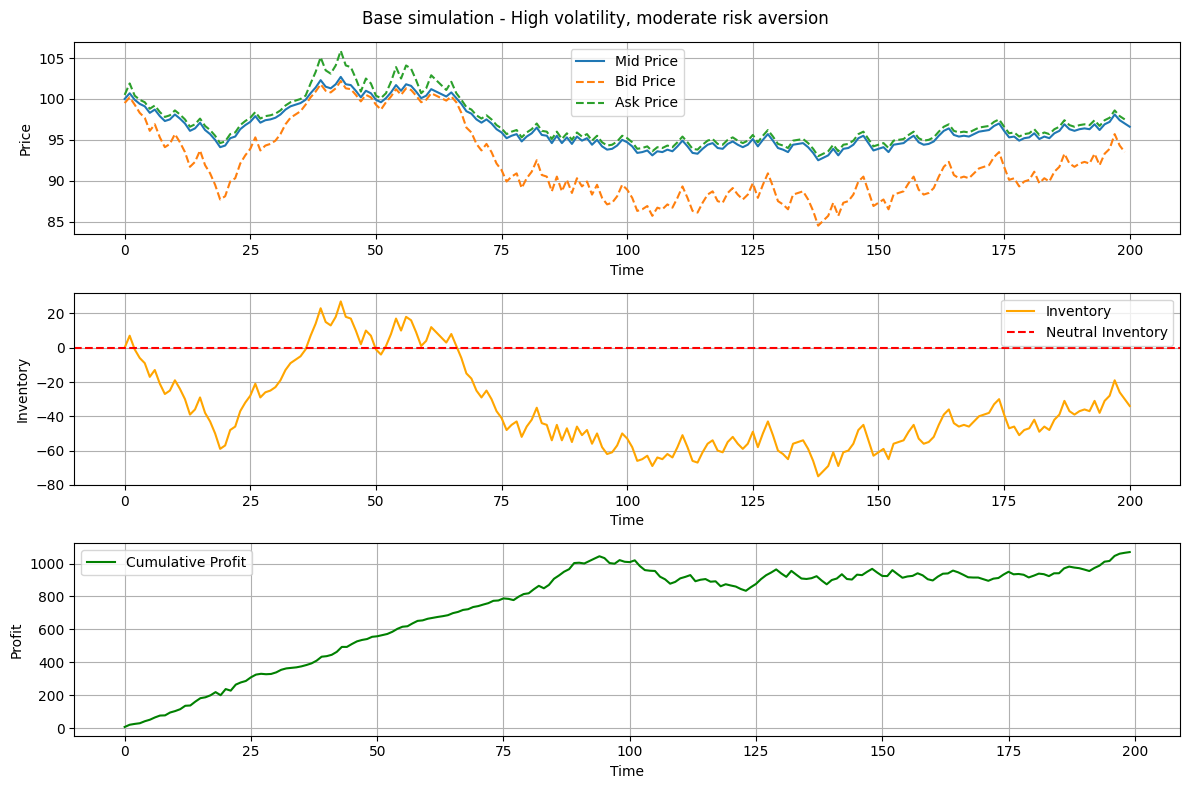

In [110]:
# Parameters
np.random.seed(42)
P_0 = 100          # Initial price
kappa = 0.1        # Price sensitivity
gamma = 0.1        # Inventory adjustment weight
spread_base = 0.5  # Base spread
lambda_inv = 0.01  # Inventory risk penalty
num_steps = 200    # Simulation steps

# Simulation
prices, inventory_levels, profits, bid_prices, ask_prices, spreads, sides = simulate(
    P_0, spread_base, gamma, num_steps, kappa, lambda_inv)

# Plots
plot(prices, bid_prices, ask_prices, inventory_levels, profits,
     title="Base simulation - High volatility, moderate risk aversion")

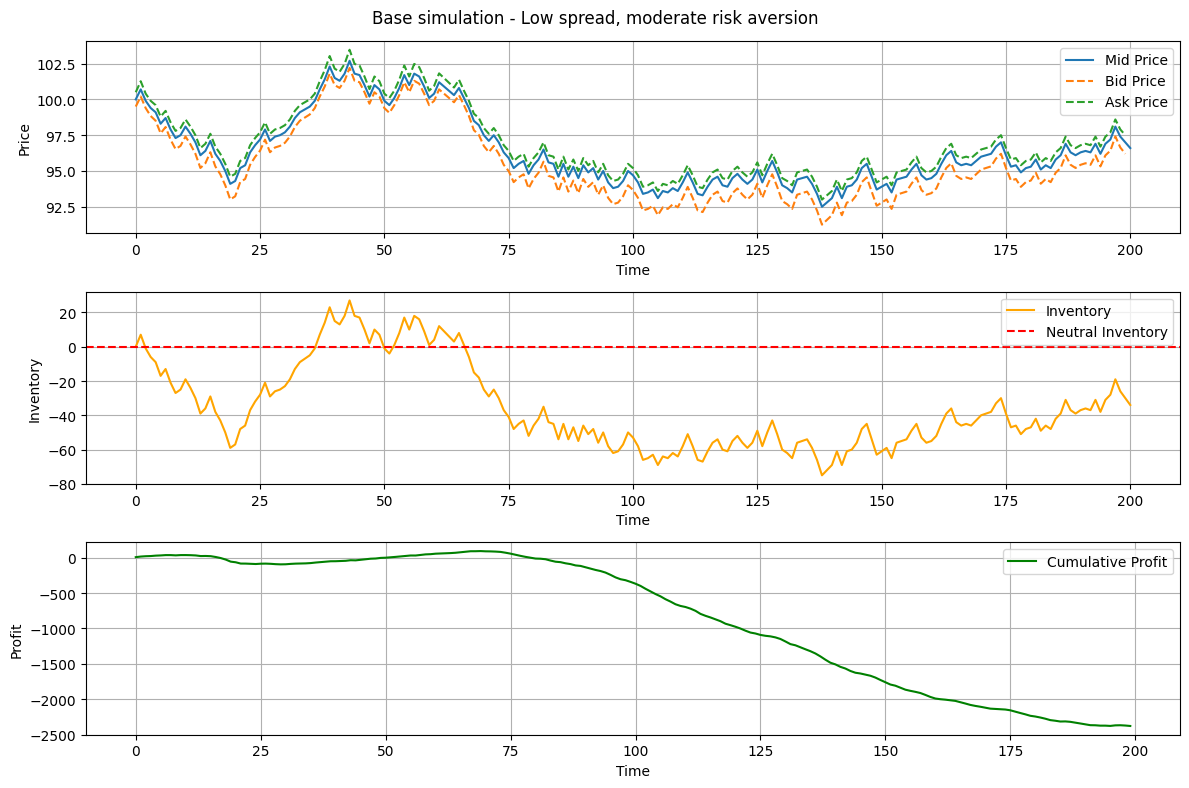

In [111]:
# Parameters
np.random.seed(42)
P_0 = 100          # Initial price
kappa = 0.1        # Price sensitivity
gamma = 0.01       # Inventory adjustment weight
spread_base = 0.5  # Base spread
lambda_inv = 0.01  # Inventory risk penalty
num_steps = 200    # Simulation steps

# Simulation
prices, inventory_levels, profits, bid_prices, ask_prices, spreads, sides = simulate(
    P_0, spread_base, gamma, num_steps, kappa, lambda_inv)

# Plots
plot(prices, bid_prices, ask_prices, inventory_levels, profits,
     title="Base simulation - Low spread, moderate risk aversion")

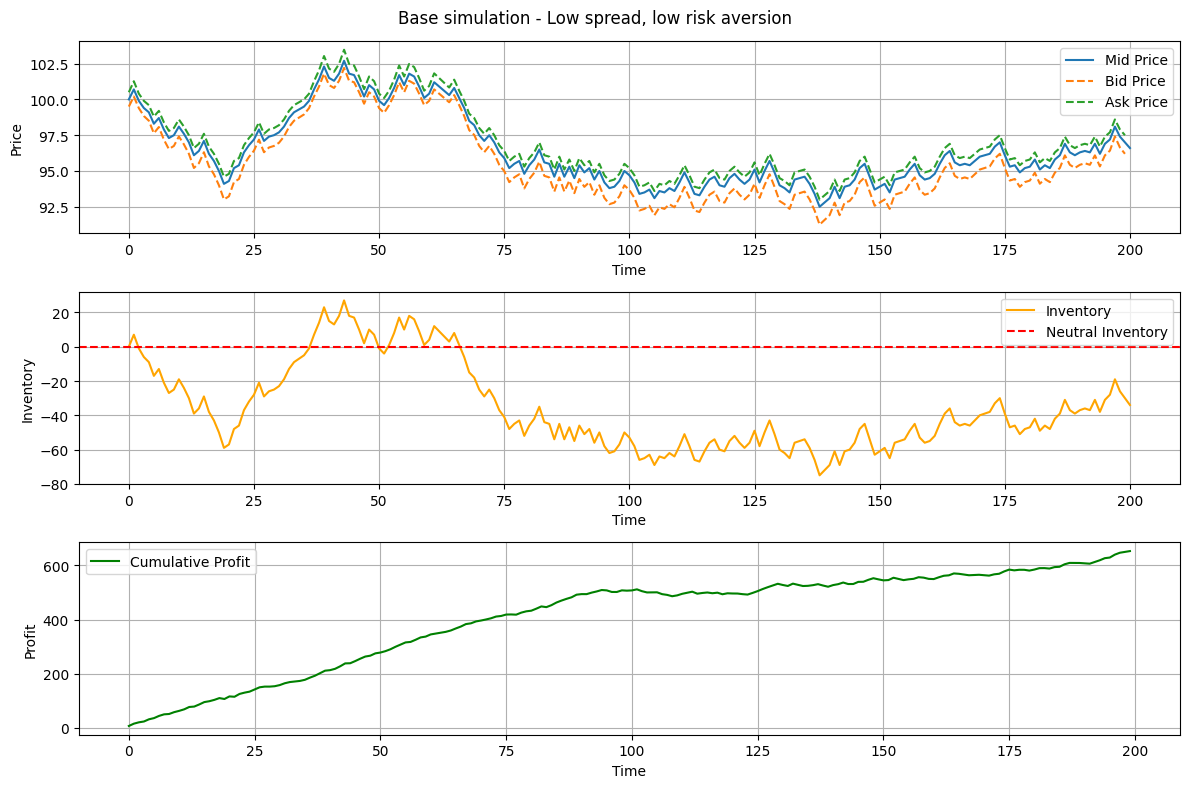

In [112]:
# Parameters
np.random.seed(42)
P_0 = 100          # Initial price
kappa = 0.1        # Price sensitivity
gamma = 0.01       # Inventory adjustment weight
spread_base = 0.5  # Base spread
lambda_inv = 0.002 # Inventory risk penalty
num_steps = 200    # Simulation steps

# Simulation
prices, inventory_levels, profits, bid_prices, ask_prices, spreads, sides = simulate(
    P_0, spread_base, gamma, num_steps, kappa, lambda_inv)

# Plots
plot(prices, bid_prices, ask_prices, inventory_levels, profits,
     title="Base simulation - Low spread, low risk aversion")